<a href="https://colab.research.google.com/github/agushery/DataVisualization-COVID19/blob/master/Data_Visualization_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

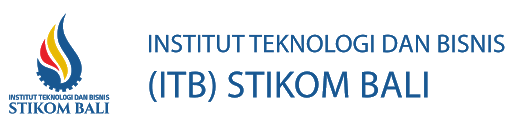

# **Data Visualization Covid-19**
* Nama : Agus Hery Setiawan

**Data Source : https://github.com/CSSEGISandData**








## **Prepare library and processing the dataset**

### **Import Library**


In [1]:
# for load dataset
import pandas as pd

# for visual
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8
import cufflinks as cf
cf.go_offline()

import seaborn as sns
sns.set_style('whitegrid')

print('Setu[ Complete')


Setu[ Complete


### **Load Dataset from source**

In [2]:
# save url to variabel
url_confirm = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# load dataset with pandas
confirm_data = pd.read_csv(url_confirm)
death_data = pd.read_csv(url_death)
recovery_data = pd.read_csv(url_recovery)

print('Load Dataset Complete')

Load Dataset Complete


### **Check Shape and Info of Dataset**

SHAPE

In [3]:
print('confirm_data : ', confirm_data.shape)
print('death_data : ', death_data.shape)
print('recovery_data : ', recovery_data.shape)

confirm_data :  (275, 492)
death_data :  (275, 492)
recovery_data :  (260, 492)


INFO

In [4]:
print('confirm_data : ', confirm_data.info())
print('death_data : ', death_data.info())
print('recovery_data : ', recovery_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 492 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(2)
memory usage: 1.0+ MB
confirm_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 492 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(2)
memory usage: 1.0+ MB
death_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 492 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(2)
memory usage: 999.5+ KB
recovery_data :  None


In [5]:
confirm_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441


### **Melt Data**

In [6]:
# Confirmed
confirm_data = confirm_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Confirmed'
)

# Death
death_data = death_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Deaths'
)

# Recovery
recovery_data = recovery_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Recovered'
)

In [7]:
death_data.head()

,Province/State,Country/Region,Lat,Long,Time,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


### **Merge Data**

Grouped Data  with same Country/Region and Time

In [8]:
# Confirmed Data
confirm_data = confirm_data.groupby(['Country/Region', 'Time'])['Confirmed'].sum()
confirm_data = confirm_data.to_frame().reset_index()

# Deaths Data
death_data = death_data.groupby(['Country/Region', 'Time'])['Deaths'].sum()
death_data = death_data.to_frame().reset_index()

# Recovery Data
recovery_data = recovery_data.groupby(['Country/Region', 'Time'])['Recovered'].sum()
recovery_data = recovery_data.to_frame().reset_index()

Merge dataset

In [9]:
data = confirm_data.merge(death_data, how='inner')
data = data.merge(recovery_data, how='inner')
data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered
0,Afghanistan,1/1/21,51526,2191,41727
1,Afghanistan,1/10/21,53489,2277,43948
2,Afghanistan,1/11/21,53538,2288,44137
3,Afghanistan,1/12/21,53584,2301,44608
4,Afghanistan,1/13/21,53584,2301,44850


In [10]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93696 entries, 0 to 93695
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  93696 non-null  object
 1   Time            93696 non-null  object
 2   Confirmed       93696 non-null  int64 
 3   Deaths          93696 non-null  int64 
 4   Recovered       93696 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.3+ MB


### **Add Active Cases Column, groupped data and sort Time Column (increase)**

In [11]:
# Add Active Column
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

In [12]:
# groupped data
data['Time'] = pd.to_datetime(data['Time'])
dataGroup = data.groupby('Time')[["Confirmed","Deaths","Recovered","Active"]].sum()

In [13]:
# Sort Data
dataSort = data.sort_values(by='Time')

In [14]:
data

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2021-01-01,51526,2191,41727,7608
1,Afghanistan,2021-01-10,53489,2277,43948,7264
2,Afghanistan,2021-01-11,53538,2288,44137,7113
3,Afghanistan,2021-01-12,53584,2301,44608,6675
4,Afghanistan,2021-01-13,53584,2301,44850,6433
...,...,...,...,...,...,...
93691,Zimbabwe,2020-09-05,6837,206,5345,1286
93692,Zimbabwe,2020-09-06,6837,206,5345,1286
93693,Zimbabwe,2020-09-07,7298,210,5455,1633
93694,Zimbabwe,2020-09-08,7388,218,5477,1693


### **Initiation first and last day of data**

In [15]:
first_date = data['Time'].min()
first_day = data[data['Time'] == first_date]
recent_date = data['Time'].max()
last_day = data[data['Time'] == recent_date]

### **Categories Country**

In [16]:
# Check standar statistic data
last_day.describe()

,Confirmed,Deaths,Recovered,Active
count,1.920000e+02,192.000000,1.920000e+02,1.920000e+02
mean,8.707150e+05,18040.692708,5.396890e+05,3.129854e+05
std,3.365025e+06,62618.579472,2.102144e+06,2.416908e+06
min,1.000000e+00,0.000000,0.000000e+00,-1.230200e+04
25%,1.145600e+04,152.250000,7.522000e+03,4.797500e+02
50%,9.603550e+04,1239.500000,4.759850e+04,4.456500e+03
75%,3.890772e+05,7733.500000,2.827870e+05,3.760925e+04
max,3.311774e+07,589893.000000,2.372801e+07,3.252784e+07


In [17]:
# Use percentile to categorize countries
cukupRawan = last_day[(last_day['Confirmed'] <= 1.143125e+04) | (last_day['Active'] <= 4.627500e+02)]
rawan = last_day[(((last_day['Confirmed'] > 1.143125e+04) & (last_day['Confirmed'] <= 9.536800e+04))) | (((last_day['Active'] > 4.627500e+02) & (last_day['Active'] <= 5.066000e+03)))]
sangatRawan = last_day[(last_day['Confirmed'] > 9.536800e+04) | (last_day['Active'] > 5.066000e+03)]

## **VISUALIZATION DATA**

### **Time span from confirmed COVID-19 cases**

In [18]:
dataGroup.iplot(kind = "bar", y = "Confirmed", title = "Trend Confirmed Case Global Covid-19",
                      xTitle = "Time", yTitle = 'Number of confirmed cases')

### **Trend Deaths Case Global Covid-19**

In [19]:
dataGroup.iplot(kind = "bar", y = "Deaths", title = "Trend Deaths Case Global Covid-19",
                      xTitle = "Time", yTitle = 'Number of death cases')

### **Trend Recovered Case Global Covid-19**

In [20]:
dataGroup.iplot(kind = "bar", y = "Recovered", title = "Trend Recovered Case Global Covid-19",
                      xTitle = "Time", yTitle = 'Number of recovery cases')

### **Confirmed, Deaths, Recovered, and Active Case**

In [21]:
dataGroup.iplot(title = "Trend Kasus COVID-19 Secara Global", xTitle = "Time", yTitle = "Amount")

## **Categories Country**

In [22]:
# Cukup Rawan
fig = px.choropleth(last_day, locations=cukupRawan['Country/Region'],
                    color=cukupRawan['Confirmed'],locationmode='country names', 
                    hover_name=cukupRawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="The country is quite vulnerable")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

In [23]:
# Rawan
fig = px.choropleth(last_day, locations=rawan['Country/Region'],
                    color=rawan['Confirmed'],locationmode='country names', 
                    hover_name=rawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Negara Rawan")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

In [24]:
# Sangat Rawan
fig = px.choropleth(last_day, locations=sangatRawan['Country/Region'],
                    color=sangatRawan['Confirmed'],locationmode='country names', 
                    hover_name=sangatRawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Negara Sangat Rawan")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

### **Persebaran Hari terakhir data covid 19 yang di dapat**

In [25]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Confirmed'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Last Update Data Visual covid 19 Global")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()